In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("titanic_train_dataset.csv")
len(df)

891

In [9]:
df.head()
df.index
df.columns
df.info()
df.dtypes
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

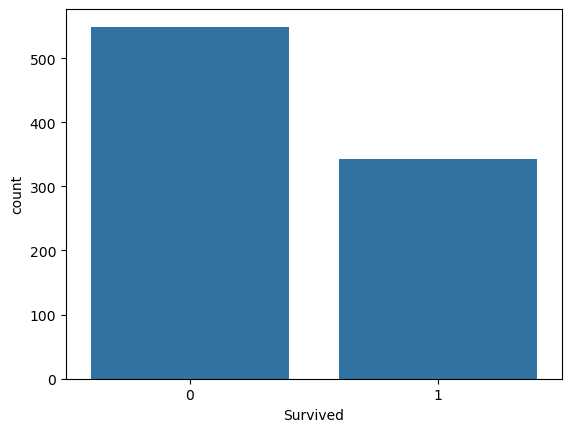

In [11]:
sns.countplot(x = 'Survived' ,data=df)

<Axes: xlabel='Survived', ylabel='count'>

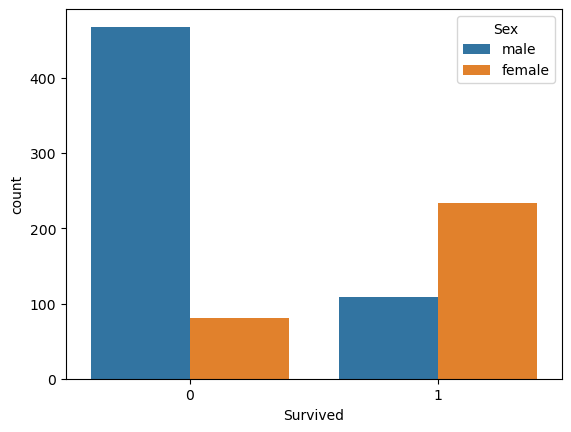

In [13]:
sns.countplot(x = 'Survived' ,data=df , hue= 'Sex')


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

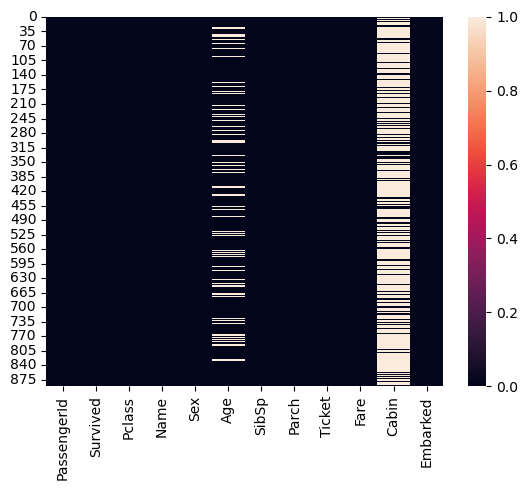

In [17]:
sns.heatmap(df.isnull())

In [19]:
df['Age'].isnull().sum()/len(df['Age'])*100

19.865319865319865

In [21]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100

77.10437710437711

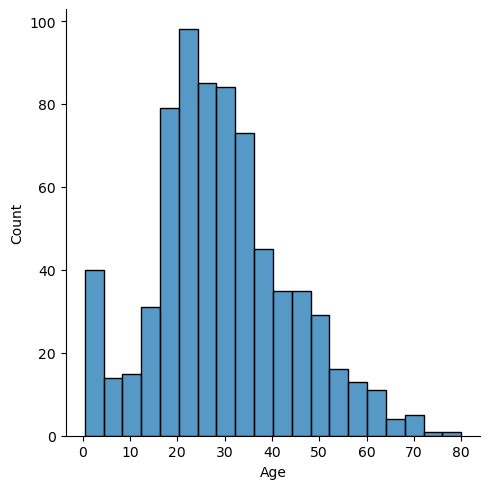

In [23]:
sns.displot(x='Age',data=df)

In [81]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\namra\AppData\Local\Temp\ipykernel_22892\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


<Axes: >

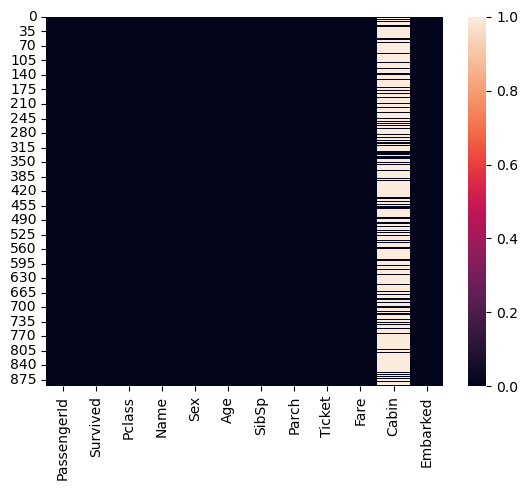

In [27]:
df['Age'].isnull().sum()
sns.heatmap(df.isnull())

In [29]:
df.drop('Cabin' ,  axis =1 , inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [41]:
 gender = pd.get_dummies(df['Sex'].astype(str), drop_first=True)  # convert categorical data into numeric binary features, making it suitable for ML models.

In [43]:
gender = gender.astype(int)
df['Gender'] = gender
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [45]:
df.drop(['Name' , 'Sex' , 'Ticket' , 'Embarked'] , axis=1 , inplace= True)

In [47]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [49]:
x = df[['PassengerId' , 'Pclass' , 'Age' , 'Parch' , 'Fare' , 'Parch' , 'Gender']]
y = df['Survived']

In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()

In [61]:
lr.fit(x_train,y_train)

C:\Users\namra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predict = lr.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
pd.DataFrame(confusion_matrix(y_test,predict),columns = ['Predicted NO', 'Predicted Yes'],index = ['Actual NO' , 'Actual Yes'])

,Predicted NO,Predicted Yes
Actual NO,151,24
Actual Yes,37,83


In [69]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [73]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,FamilySize,IsAlone
0,1,0,3,22.000000,1,0,7.2500,1,2,0
1,2,1,1,38.000000,1,0,71.2833,0,2,0
2,3,1,3,26.000000,0,0,7.9250,0,1,1
3,4,1,1,35.000000,1,0,53.1000,0,2,0
4,5,0,3,35.000000,0,0,8.0500,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,1,1
887,888,1,1,19.000000,0,0,30.0000,0,1,1
888,889,0,3,29.699118,1,2,23.4500,0,4,0
889,890,1,1,26.000000,0,0,30.0000,1,1,1



Feature Coefficients:
       Feature  Coefficient
3        Fare     0.002673
2         Age    -0.037461
4  FamilySize    -0.399156
5     IsAlone    -0.712669
0      Pclass    -0.994438
1      Gender    -2.595514


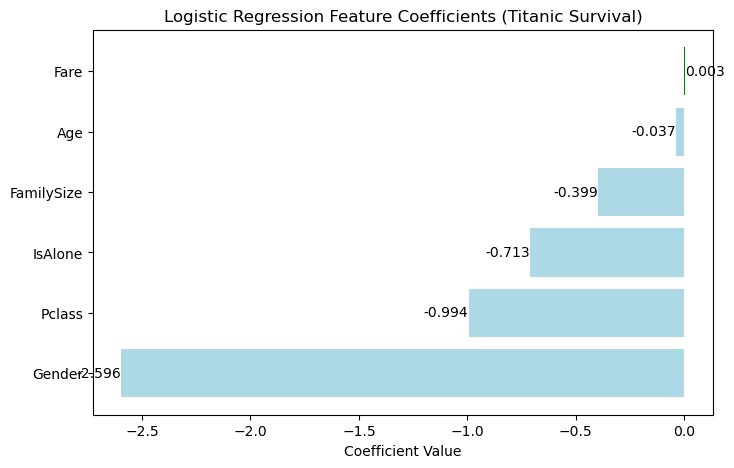

In [79]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

# Select features and target
features = ['Pclass', 'Gender', 'Age', 'Fare', 'FamilySize', 'IsAlone']
df = df[features + ['Survived']].dropna()
X = df[features]
y = df['Survived']

# Train logistic regression model
model = LogisticRegression(max_iter=1000)   # increase iterations so it converges
model.fit(X, y)

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:\n", coefficients)

# Plot coefficients
plt.figure(figsize=(8,5))
bars = plt.barh(coefficients['Feature'], coefficients['Coefficient'], 
                color=['green' if c > 0 else 'lightblue' for c in coefficients['Coefficient']])

plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients (Titanic Survival)")

# Add numbers on bars
for bar, coef in zip(bars, coefficients['Coefficient']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{coef:.3f}", va='center',
             ha='left' if coef > 0 else 'right')

plt.gca().invert_yaxis()
plt.show()
